In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import paper_vrp_mini as research
from paper_vrp_mini import visuals
visuals.set_visuals()


In [2]:
%matplotlib inline

In [7]:
hangar = research.ResearchData(
    "c:/Users/Igor/Documents/projects/option_implied_covs" +
    "/vrp_paper_hangar_mini.h5")

# print first 0 keys stored in the hangar
print(hangar.keys[:10])

['/mfiv/m12m', '/mfiv/m1m', '/mfiv/m2m', '/mfiv/m3m', '/mfiv/m4m', '/mfiv/m6m', '/mfiv/m9m', '/usd_index/uni_aud_cad_chf_eur_gbp_jpy_nzd/reb_B/mfiv/m12m', '/usd_index/uni_aud_cad_chf_eur_gbp_jpy_nzd/reb_B/mfiv/m1m', '/usd_index/uni_aud_cad_chf_eur_gbp_jpy_nzd/reb_B/mfiv/m2m']


In [8]:
# parameters
horizon_s = "3m"
counter_currency = "usd"
row_idx = "2015-01-14"

In [9]:
# fetch MFIV, take one row
mfiv = hangar.get("mfiv/m" + horizon_s)

In [10]:
# calculate
mfiv_row = mfiv.loc[row_idx]
mficov = research.fx_covmat_from_variances(mfiv_row, 
                                           counter_currency)

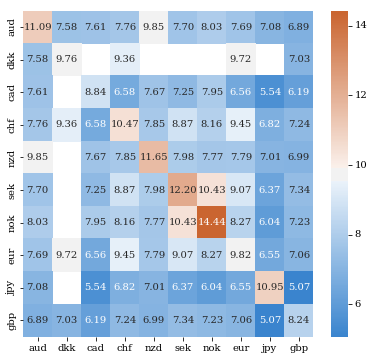

In [11]:
# plot
fig, ax = plt.subplots(figsize=visuals.figsize_2, facecolor='w')
sns.heatmap(mficov.pow(1/2)*100, 
            ax=ax, annot=True, fmt=".2f", square=False, 
            cmap=visuals.heatmap_cmap)

In [13]:
# define weights of currencies
portfolio = pd.Series({"aud": 1/3, "nzd": 1/3, "cad": 1/3, 
                       "jpy": -1/3, "chf": -1/3, "eur": -1/3})

portfolio = portfolio.reindex(mficov.columns, fill_value=0.0)

# to CovarianceDataFrame
mficov_c = research.CovarianceDataFrame(mficov)

portfolio_var = mficov_c.quadratic_form(other=portfolio,
                                        trim=True)

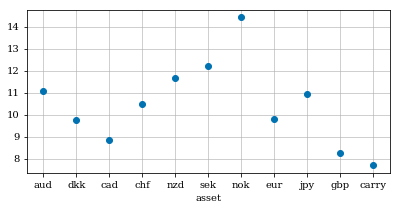

In [28]:
# plot
to_plot = mficov_c.get_variances()\
    .assign(carry=portfolio_var)\
    .iloc[0]\
    .pow(1/2) * 100
fig, ax = plt.subplots(figsize=visuals.figsize_1, facecolor='w')
to_plot.plot(ax=ax, linestyle="none", marker='o')
ax.set_xticks(range(len(to_plot)))
ax.set_xticklabels(to_plot.index)